# Bab 2 Hebb Net

## Fungsi-fungsi *plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [97]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    color = 'ro', 'bo'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], color[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

## Praktikum

### a) Fungsi *step* Bipolar

Tulis kode ke dalam *cell* di bawah ini:

In [98]:
def bipstep(y, th=0):
    return 1 if y >= th else -1

### b) Fungsi *training* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [99]:
def hebb_fit(train, target, verbose=False, draw=False, draw_padding=1):
    w = np.zeros(len(train[0]) + 1)
    bias = np.ones((len(train), 1))
    train = np.hstack((bias, train))

    for r, row in enumerate(train):
        w = [w[i] + row[i] * target[r] for i in range(len(row))]

        if verbose:
            print('Bobot:', w)

        if draw:
            plot(line(w, 0), train, target, draw_padding)

    return w

### c) Fungsi *testing* Hebb

Tulis kode ke dalam *cell* di bawah ini:

In [100]:
def hebb_predict(X, w):
    Y = []

    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = bipstep(y_in)

        Y.append(y)

    return Y

### d) Fungsi Hitung Akurasi

In [101]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]

    return sum(s) / len(a)

### e) Logika AND

Tulis kode ke dalam *cell* di bawah ini:

In [102]:
from sklearn.metrics import accuracy_score

train = ((1, 1), (1, -1), (-1, 1), (-1, -1))
target = [1, -1, -1, -1]

model = hebb_fit(train, target, verbose=False, draw=False)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

Output: [1, -1, -1, -1]
Target: [1, -1, -1, -1]
Accuracy: 1.0


### f) Logika OR

Tulis kode ke dalam *cell* di bawah ini:

Bobot: [1.0, 1.0, 1.0]


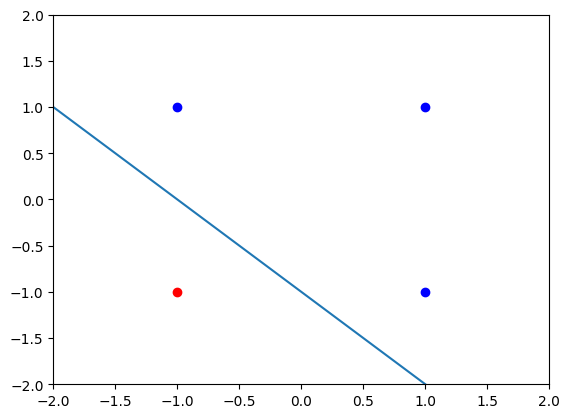

Bobot: [2.0, 2.0, 0.0]


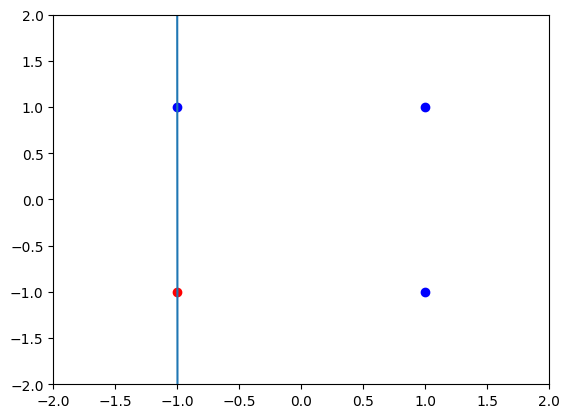

Bobot: [3.0, 1.0, 1.0]


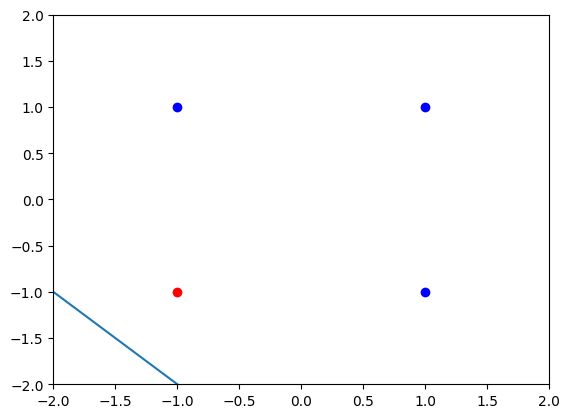

Bobot: [2.0, 2.0, 2.0]


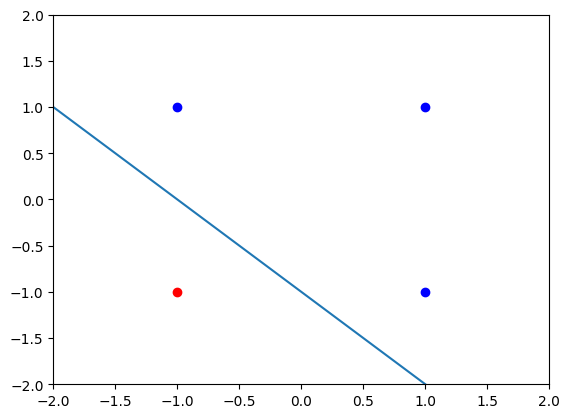

Output: [1, 1, 1, -1]
Target: [1, 1, 1, -1]
Accuracy: 1.0


In [103]:
train = ((1, 1), (1, -1), (-1, 1), (-1, -1))
target = [1, 1, 1, -1]

model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### g) Logika AND NOT

Tulis kode ke dalam *cell* di bawah ini:

Bobot: [-1.0, -1.0, -1.0]


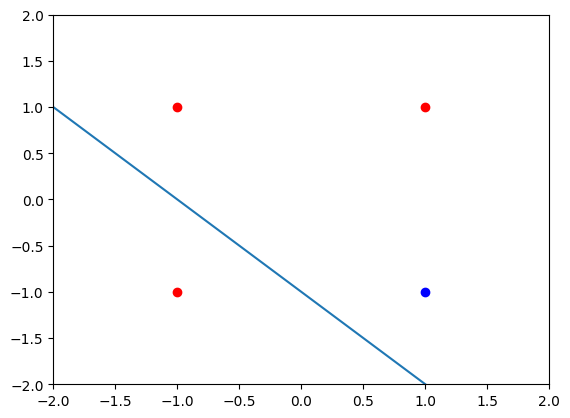

Bobot: [0.0, 0.0, -2.0]


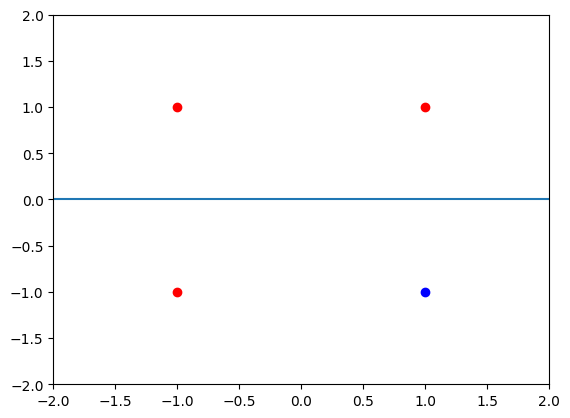

Bobot: [-1.0, 1.0, -3.0]


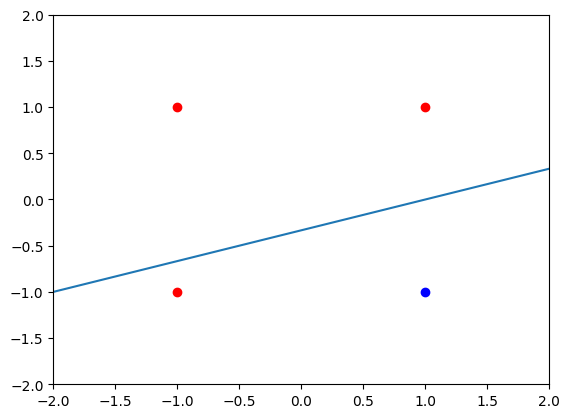

Bobot: [-2.0, 2.0, -2.0]


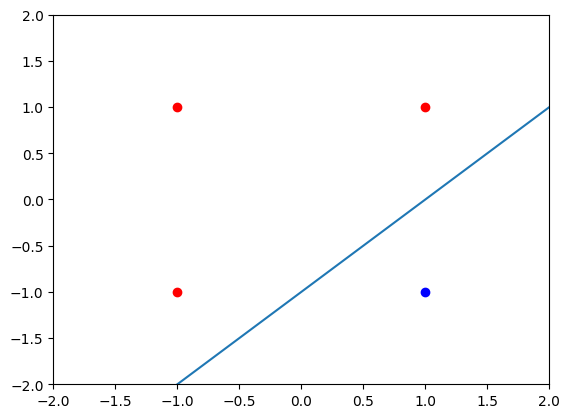

Output: [-1, 1, -1, -1]
Target: [-1, 1, -1, -1]
Accuracy: 1.0


In [104]:
train = ((1, 1), (1, -1), (-1, 1), (-1, -1))
target = [-1, 1, -1, -1]

model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### h) Logika XOR

Tulis kode ke dalam *cell* di bawah ini:

Bobot: [-1.0, -1.0, -1.0]


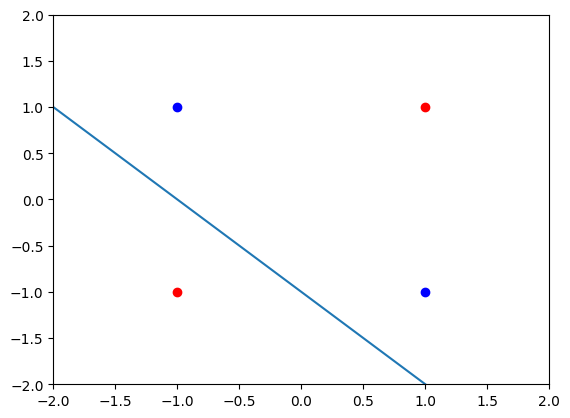

Bobot: [0.0, 0.0, -2.0]


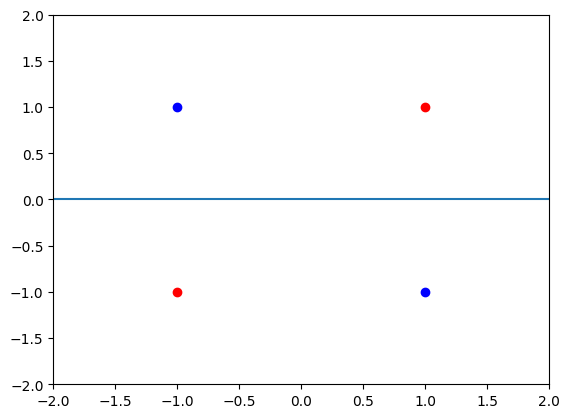

Bobot: [1.0, -1.0, -1.0]


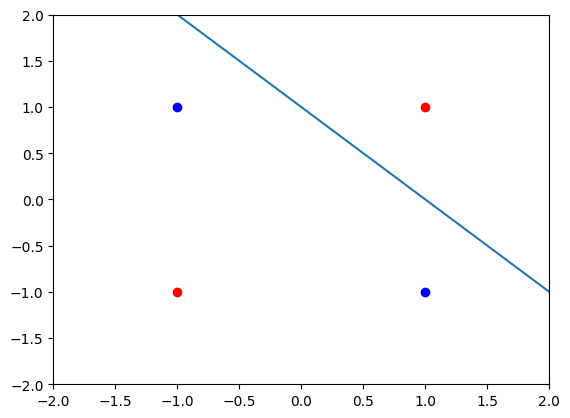

Bobot: [0.0, 0.0, 0.0]


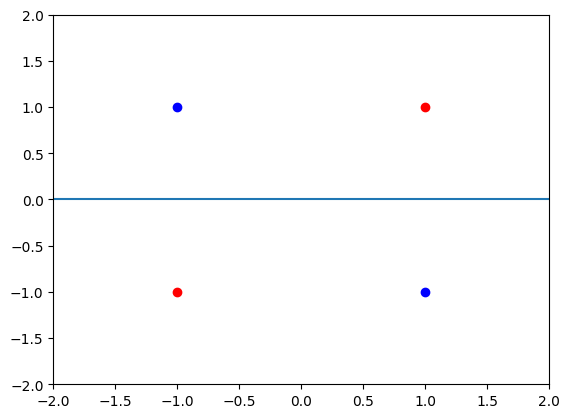

Output: [1, 1, 1, 1]
Target: [-1, 1, 1, -1]
Accuracy: 0.5


In [105]:
train = ((1, 1), (1, -1), (-1, 1), (-1, -1))
target = [-1, 1, 1, -1]

model = hebb_fit(train, target, verbose=True, draw=True)
output = hebb_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)


### 1. Pada klasifikasi menggunakan logika XOR, mengapa akurasi yang didapat tidak mencapai 1 (100%)?

Pada klasifikasi XOR, akurasi tidak mencapai 100% karena XOR bersifat non-linear dan model sederhana seperti Perceptron atau Hebb hanya bisa memisahkan data yang linear, sedangkan XOR tidak bisa dipisahkan dengan garis lurus.

### 2. Lakukan proses training dan testing menggunakan data berikut. 
###    (-1, 0.5), (0.5, 0.3), (1, 1.5), (3, 1.9) Target: [-1, -1, 1, 1] Berapakah akurasi yang didapatkan? Mengapa tidak dapat mencapai akurasi 1 (100%)?

# Fungsi bipolar step

#### Fungsi Bipstep

In [106]:
def bipstep(y, th=0):
    return 1 if y >= th else -1

#### Fungsi Training Hebb

In [107]:

def hebb_fit(train, target, verbose=False):
    w = np.zeros(len(train[0]) + 1) 
    bias = np.ones((len(train), 1)) 
    train = np.hstack((bias, train))

    for r, row in enumerate(train):
        w = [w[i] + row[i] * target[r] for i in range(len(row))]

        if verbose:
            print(f'Bobot setelah iterasi {r + 1}: {w}')

    return w

#### Fungsi Testing Hebb

In [108]:

def hebb_predict(X, w):
    Y = []
    for x in X:
        y_in = w[0] + np.dot(x, w[1:]) 
        y = bipstep(y_in)  
        Y.append(y)
    return Y

#### Data training dan target

In [109]:

train = np.array([[-1, 0.5], [0.5, 0.3], [1, 1.5], [3, 1.9]])
target = [-1, -1, 1, 1]

#### Proses Training

In [110]:

print("Proses pelatihan:")
model = hebb_fit(train, target, verbose=True)

Proses pelatihan:
Bobot setelah iterasi 1: [-1.0, 1.0, -0.5]
Bobot setelah iterasi 2: [-2.0, 0.5, -0.8]
Bobot setelah iterasi 3: [-1.0, 1.5, 0.7]
Bobot setelah iterasi 4: [0.0, 4.5, 2.5999999999999996]


#### Proses Testing

In [111]:
test = hebb_predict(train, model)

#### Evaluasi Model

In [112]:

accuracy = accuracy_score(test, target)

#### Hasil

In [113]:

print('\nOutput Prediksi:', test)
print('Target Asli:', target)
print(f'Akurasi: {accuracy:.2f}')



Output Prediksi: [-1, 1, 1, 1]
Target Asli: [-1, -1, 1, 1]
Akurasi: 0.75


Penyebab utama akurasi tidak mencapai 100% adalah data tidak linear separable, sehingga Hebb Learning, yang hanya mampu menangani pemisahan linear, gagal mempelajari pola dengan sempurna. Jika Anda ingin mencapai akurasi 100%, Anda perlu menggunakan model yang lebih kompleks seperti seperti perceptron multilayer atau jaringan saraf tiruan yang mampu menangani data non-linear.